In [18]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Classifier").getOrCreate()

In [19]:
# Read the data
df = spark.read.csv(r"C:\Users\user\Downloads\car_evaluation.csv",inferSchema=True).toDF('buying','maint','doors','person','lug_boot','safety','class')
df.show()

+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
| vhigh|vhigh|    2|     2|   small|   low|unacc|
| vhigh|vhigh|    2|     2|   small|   med|unacc|
| vhigh|vhigh|    2|     2|   small|  high|unacc|
| vhigh|vhigh|    2|     2|     med|   low|unacc|
| vhigh|vhigh|    2|     2|     med|   med|unacc|
| vhigh|vhigh|    2|     2|     med|  high|unacc|
| vhigh|vhigh|    2|     2|     big|   low|unacc|
| vhigh|vhigh|    2|     2|     big|   med|unacc|
| vhigh|vhigh|    2|     2|     big|  high|unacc|
| vhigh|vhigh|    2|     4|   small|   low|unacc|
| vhigh|vhigh|    2|     4|   small|   med|unacc|
| vhigh|vhigh|    2|     4|   small|  high|unacc|
| vhigh|vhigh|    2|     4|     med|   low|unacc|
| vhigh|vhigh|    2|     4|     med|   med|unacc|
| vhigh|vhigh|    2|     4|     med|  high|unacc|
| vhigh|vhigh|    2|     4|     big|   low|unacc|
| vhigh|vhigh|    2|     4|     big|   med|unacc|


In [20]:
df.dtypes

[('buying', 'string'),
 ('maint', 'string'),
 ('doors', 'string'),
 ('person', 'string'),
 ('lug_boot', 'string'),
 ('safety', 'string'),
 ('class', 'string')]

In [21]:
df.printSchema()

root
 |-- buying: string (nullable = true)
 |-- maint: string (nullable = true)
 |-- doors: string (nullable = true)
 |-- person: string (nullable = true)
 |-- lug_boot: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- class: string (nullable = true)



In [22]:
df.columns

['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

In [23]:
#from pyspark.sql.types import IntegerType

#df = df.withColumn("buying",df["buying"].cast(IntegerType()))
#df = df.withColumn("maint",df["maint"].cast(IntegerType()))
#df = df.withColumn("doors",df["doors"].cast(IntegerType()))
#df = df.withColumn("person",df["person"].cast(IntegerType()))
#df = df.withColumn("lug_boot",df["lug_boot"].cast(IntegerType()))
#df = df.withColumn("safety",df["safety"].cast(IntegerType()))
#df = df.withColumn("class",df["class"].cast(IntegerType()))

In [24]:
df.dtypes

[('buying', 'string'),
 ('maint', 'string'),
 ('doors', 'string'),
 ('person', 'string'),
 ('lug_boot', 'string'),
 ('safety', 'string'),
 ('class', 'string')]

In [25]:
df.columns

['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']

In [26]:
df.printSchema()

root
 |-- buying: string (nullable = true)
 |-- maint: string (nullable = true)
 |-- doors: string (nullable = true)
 |-- person: string (nullable = true)
 |-- lug_boot: string (nullable = true)
 |-- safety: string (nullable = true)
 |-- class: string (nullable = true)



In [27]:
for i in df.columns:
  print(df.filter(df[i].isNull()).show())

+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
+------+-----+-----+------+--------+------+-----+

None
+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
+------+-----+-----+------+--------+------+-----+

None
+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
+------+-----+-----+------+--------+------+-----+

None
+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
+------+-----+-----+------+--------+------+-----+

None
+------+-----+-----+------+--------+------+-----+
|buying|maint|doors|person|lug_boot|safety|class|
+------+-----+-----+------+--------+------+-----+
+------+-----+-----+------

In [28]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import concat
indexer_list=[]
for col in df.columns:
     indexer= StringIndexer(inputCol=col,outputCol='independent_encoder_'+col)
     indexer_list.append(indexer)
for idxer in indexer_list:
     df=idxer.fit(df).transform(df)
df.show()

+------+-----+-----+------+--------+------+-----+--------------------------+-------------------------+-------------------------+--------------------------+----------------------------+--------------------------+-------------------------+
|buying|maint|doors|person|lug_boot|safety|class|independent_encoder_buying|independent_encoder_maint|independent_encoder_doors|independent_encoder_person|independent_encoder_lug_boot|independent_encoder_safety|independent_encoder_class|
+------+-----+-----+------+--------+------+-----+--------------------------+-------------------------+-------------------------+--------------------------+----------------------------+--------------------------+-------------------------+
| vhigh|vhigh|    2|     2|   small|   low|unacc|                       3.0|                      3.0|                      0.0|                       0.0|                         2.0|                       1.0|                      0.0|
| vhigh|vhigh|    2|     2|   small|   med|unacc

In [29]:
df.columns

['buying',
 'maint',
 'doors',
 'person',
 'lug_boot',
 'safety',
 'class',
 'independent_encoder_buying',
 'independent_encoder_maint',
 'independent_encoder_doors',
 'independent_encoder_person',
 'independent_encoder_lug_boot',
 'independent_encoder_safety',
 'independent_encoder_class']

In [32]:
from pyspark.ml.feature import VectorAssembler
va= VectorAssembler(inputCols=['independent_encoder_buying',
 'independent_encoder_maint',
 'independent_encoder_doors',
 'independent_encoder_person',
 'independent_encoder_lug_boot',
 'independent_encoder_safety'],outputCol='features')
output=va.transform(df)
output.show()

+------+-----+-----+------+--------+------+-----+--------------------------+-------------------------+-------------------------+--------------------------+----------------------------+--------------------------+-------------------------+--------------------+
|buying|maint|doors|person|lug_boot|safety|class|independent_encoder_buying|independent_encoder_maint|independent_encoder_doors|independent_encoder_person|independent_encoder_lug_boot|independent_encoder_safety|independent_encoder_class|            features|
+------+-----+-----+------+--------+------+-----+--------------------------+-------------------------+-------------------------+--------------------------+----------------------------+--------------------------+-------------------------+--------------------+
| vhigh|vhigh|    2|     2|   small|   low|unacc|                       3.0|                      3.0|                      0.0|                       0.0|                         2.0|                       1.0|            

In [33]:
df=output.select('features','independent_encoder_class')
df.show()

+--------------------+-------------------------+
|            features|independent_encoder_class|
+--------------------+-------------------------+
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
|[3.0,3.0,0.0,0.0,...|                      0.0|
| (6,[0,1],[3.0,3.0])|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,...|                      0.0|
|[3.0,3.0,0.0,1.0,..

In [34]:
(train,test)=df.randomSplit([0.7,0.3])

In [35]:
from pyspark.ml.classification import DecisionTreeClassifier
clf=DecisionTreeClassifier(featuresCol='features',labelCol='independent_encoder_class')
clf=clf.fit(train)

In [36]:
pred=clf.transform(test)
pred.show()

+-------------------+-------------------------+--------------------+--------------------+----------+
|           features|independent_encoder_class|       rawPrediction|         probability|prediction|
+-------------------+-------------------------+--------------------+--------------------+----------+
|      (6,[0],[1.0])|                      0.0| [262.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|       0.0|
|      (6,[0],[2.0])|                      0.0| [262.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|       0.0|
|(6,[0,1],[3.0,3.0])|                      0.0| [262.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|       0.0|
|(6,[0,2],[2.0,2.0])|                      0.0| [262.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|       0.0|
|(6,[0,2],[2.0,3.0])|                      0.0| [262.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|       0.0|
|(6,[0,3],[1.0,2.0])|                      3.0| [27.0,93.0,0.0,8.0]|[0.2109375,0.7265...|       1.0|
|(6,[0,5],[1.0,1.0])|                      0.0| [398.0,0.0,0.0,0.0]|   [1.0,0.0,0.0,0.0]|  

In [38]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
evalutor= MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='independent_encoder_class', metricName='accuracy')

acc = evalutor.evaluate(pred)
print("Pridiction Accuracy: ", acc)

y_pred=pred.select('prediction').collect()
y_orig= pred.select('independent_encoder_class').collect()

cm=confusion_matrix(y_orig, y_pred)
print('Confusion Matrix: ')
print(cm)

Pridiction Accuracy:  0.8536585365853658
Confusion Matrix: 
[[354  12   0   0]
 [ 33  87   0   5]
 [  0  11   0  12]
 [  0   5   0  14]]


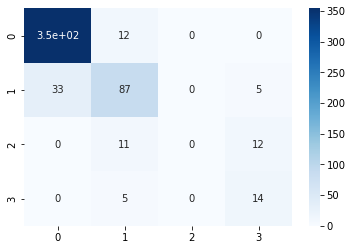

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,cmap='Blues',cbar=True)
plt.show()